## Data analysis on Writschaft Informatik

In [66]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
path_1 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Vectors/sem1.csv"
path_2 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Vectors/sem2.csv"
path_3 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Vectors/sem3.csv"
path_4 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Vectors/sem4.csv"

BHT_1 = pd.read_csv(path_1, sep=';')
BHT_2 = pd.read_csv(path_2, sep=',')
BHT_3 = pd.read_csv(path_3, sep=',')
BHT_4 = pd.read_csv(path_4, sep=',')

In [68]:
BHT_1 = BHT_1.drop(columns=['Unnamed: 0']).rename(columns={'label': 'status'})
BHT_2 = BHT_2.drop(columns=['Unnamed: 0']).rename(columns={'label': 'status'})
BHT_3 = BHT_3.drop(columns=['Unnamed: 0']).rename(columns={'label': 'status'})
BHT_4 = BHT_4.drop(columns=['Unnamed: 0']).rename(columns={'label': 'status'})

In [69]:
BHT_1 = BHT_1[BHT_1['no_passed_courses_1']<=6]
BHT_2 = BHT_2[(BHT_2['no_passed_courses_2']<=12) & (BHT_2['no_passed_courses_1']<=6)]
BHT_3 = BHT_3[(BHT_3['no_passed_courses_2']<=12) & (BHT_3['no_passed_courses_1']<=6)]
BHT_4 = BHT_4[(BHT_4['no_passed_courses_2']<=12) & (BHT_4['no_passed_courses_1']<=6)]

In [70]:
### swaping values
# after swaping, '1' is -> 'dropout' & '0'a is ->'graduate'
BHT_1['status'] = BHT_1['status'].replace([0, 1], [1, 0])
BHT_2['status'] = BHT_2['status'].replace([0, 1], [1, 0])
BHT_3['status'] = BHT_3['status'].replace([0, 1], [1, 0])
BHT_4['status'] = BHT_4['status'].replace([0, 1], [1, 0])

In [71]:
count1 = Counter(BHT_1['status'])
count2 = Counter(BHT_2['status'])
count3 = Counter(BHT_3['status'])
count4 = Counter(BHT_4['status'])

freq_table = pd.DataFrame(
        {    'S1': [count1[0], count1[1]],
            'S2': [count2[0], count2[1]],
            'S3': [count3[0], count3[1]],
            'S4': [count4[0], count4[1]]
        }, index=['0', '1'])
freq_table
# 0 is graduate and 1 is dropout

,S1,S2,S3,S4
0,96,95,95,95
1,160,102,71,59


In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_value_counts_sns(df, column):
    """
    Plots a bar chart for value counts of a categorical column with annotations using Seaborn.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the column.
    column (str): The column name to visualize.
    """
    # Get value counts
    value_counts = df[column].value_counts().reset_index()
    value_counts.columns = [column, 'count']  # Rename columns

    # Create bar plot
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=value_counts, x=column, y='count', estimator=sum, errorbar=None)

    # Annotate each bar with its count
    ax.bar_label(ax.containers[0], fontsize=12)

    # Set titles and labels
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    
    # Show the plot
    plt.show()

# Example usage



In [74]:
def plot_passed_courses_distribution(df, column, sem):
    """
    Plots a pie chart for the distribution of passed courses.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the column.
    column (str): The column name to visualize.
    sem (str): The semester to display in the title.
    """
    # Get value counts of the column
    course_counts = df[column].value_counts().sort_index()
    
    # Create a modified version where modules > 6 are grouped together
    modified_counts = course_counts.copy()
    # Convert index to integer type if needed
    modified_counts.index = modified_counts.index.astype(int)
    if (course_counts.index > 6).any():
        more_than_6 = course_counts[course_counts.index > 6].sum()
        modified_counts = modified_counts[modified_counts.index <= 6]
        modified_counts.loc['More than 6'] = more_than_6
    
    # Calculate percentages
    total = modified_counts.sum()
    percentages = (modified_counts / total * 100).round(1)
    
    # Create a DataFrame with counts and percentages
    result_df = pd.DataFrame({
        'Count': modified_counts,
        'Percentage (%)': percentages
    })
    
    # Plot pie chart
    modified_counts.plot(kind='pie', autopct='%1.0f%%', 
                         colors=plt.cm.Spectral(np.linspace(0.1, 0.42, len(modified_counts))), 
                         wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    plt.title(f'{sem}')
    plt.ylabel(' ')
    plt.show()
    
    return result_df

## BHT 1

In [75]:
BHT_1.corr(method='spearman').style.background_gradient(cmap='Blues')

,student,no_passed_courses_1,no_of_failed_courses_1,no_of_unattempted_courses_1,avg_grade_all_courses_1,status
student,1.000000,-0.278372,-0.207651,0.547948,-0.284436,0.265753
no_passed_courses_1,-0.278372,1.000000,-0.200278,-0.549917,-0.043467,-0.519295
no_of_failed_courses_1,-0.207651,-0.200278,1.000000,-0.205598,0.606886,0.254003
no_of_unattempted_courses_1,0.547948,-0.549917,-0.205598,1.000000,-0.355366,0.327199
avg_grade_all_courses_1,-0.284436,-0.043467,0.606886,-0.355366,1.000000,0.179712
status,0.265753,-0.519295,0.254003,0.327199,0.179712,1.000000


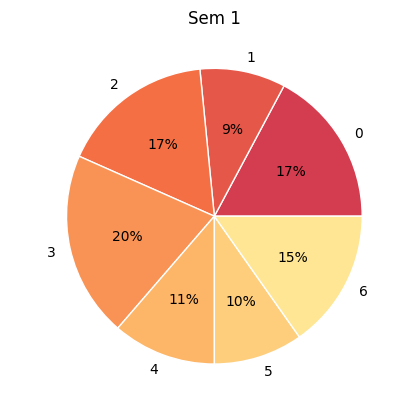

,Count,Percentage (%)
0,44,17.2
1,24,9.4
2,43,16.8
3,52,20.3
4,29,11.3
5,25,9.8
6,39,15.2


In [76]:
bht1_course_count_breakdown = plot_passed_courses_distribution(BHT_1, 'no_passed_courses_1', 'Sem 1')
bht1_course_count_breakdown

In [77]:
BHT_1.corrwith(other=BHT_1['status'], method='spearman')

student                        0.265753
no_passed_courses_1           -0.519295
no_of_failed_courses_1         0.254003
no_of_unattempted_courses_1    0.327199
avg_grade_all_courses_1        0.179712
status                         1.000000
dtype: float64

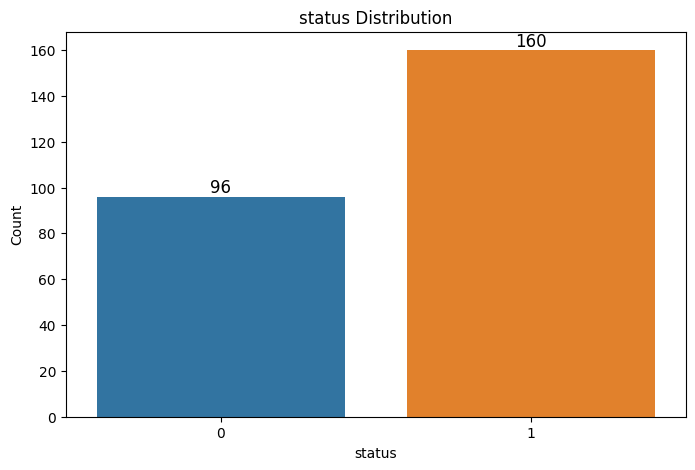

In [78]:
plot_value_counts_sns(BHT_1, 'status')

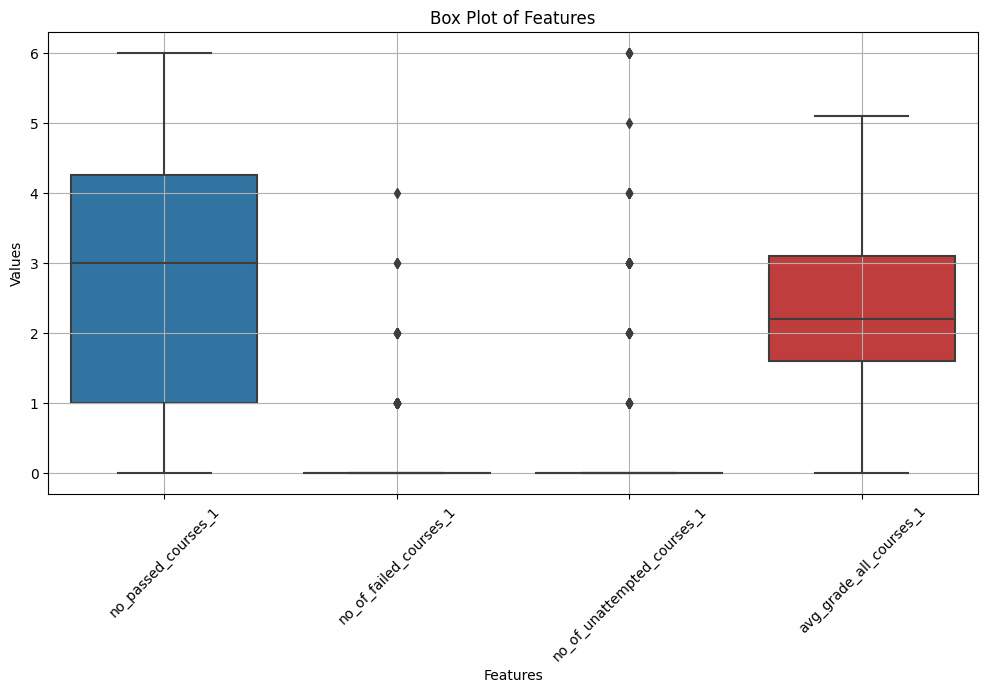

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=BHT_1.iloc[:, 1:-1])
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title("Box Plot of Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [80]:
calculate_vif(BHT_1)

,Feature,VIF
0,student,2.680926
1,no_passed_courses_1,2.429862
2,no_of_failed_courses_1,2.183635
3,no_of_unattempted_courses_1,1.864111
4,avg_grade_all_courses_1,6.887979
5,status,2.994034


## BHT 2

In [81]:
BHT_2.corr(method='spearman').style.background_gradient(cmap='Blues')

,student,no_passed_courses_2,no_of_failed_courses_2,no_of_unattempted_courses_2,avg_grade_all_courses_2,no_passed_courses_1,no_of_failed_courses_1,no_of_unattempted_courses_1,avg_grade_all_courses_1,status
student,1.000000,-0.229102,-0.199205,0.495978,-0.264017,-0.197034,-0.147494,0.382336,-0.151062,0.257593
no_passed_courses_2,-0.229102,1.000000,-0.375899,-0.445442,-0.182623,0.597188,-0.195240,-0.272394,-0.211591,-0.604900
no_of_failed_courses_2,-0.199205,-0.375899,1.000000,-0.139398,0.681272,-0.176402,0.405409,-0.172704,0.341235,0.343082
no_of_unattempted_courses_2,0.495978,-0.445442,-0.139398,1.000000,-0.385696,-0.278466,-0.117602,0.609564,-0.154581,0.353603
avg_grade_all_courses_2,-0.264017,-0.182623,0.681272,-0.385696,1.000000,-0.164847,0.388004,-0.363308,0.495125,0.230851
no_passed_courses_1,-0.197034,0.597188,-0.176402,-0.278466,-0.164847,1.000000,-0.216336,-0.252586,-0.324805,-0.506575
no_of_failed_courses_1,-0.147494,-0.195240,0.405409,-0.117602,0.388004,-0.216336,1.000000,-0.118427,0.525614,0.291142
no_of_unattempted_courses_1,0.382336,-0.272394,-0.172704,0.609564,-0.363308,-0.252586,-0.118427,1.000000,-0.247719,0.229085
avg_grade_all_courses_1,-0.151062,-0.211591,0.341235,-0.154581,0.495125,-0.324805,0.525614,-0.247719,1.000000,0.331758
status,0.257593,-0.604900,0.343082,0.353603,0.230851,-0.506575,0.291142,0.229085,0.331758,1.000000


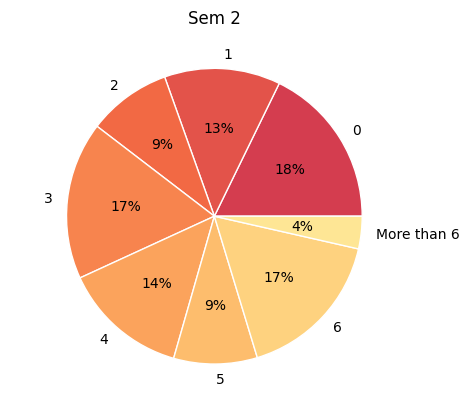

,Count,Percentage (%)
0,35,17.8
1,25,12.7
2,18,9.1
3,34,17.3
4,27,13.7
5,18,9.1
6,33,16.8
More than 6,7,3.6


In [100]:
bht2_course_count_breakdown = plot_passed_courses_distribution(BHT_2, 'no_passed_courses_2', 'Sem 2')
bht2_course_count_breakdown

In [83]:
BHT_2.corrwith(other=BHT_2['status'], method='spearman')

student                        0.257593
no_passed_courses_2           -0.604900
no_of_failed_courses_2         0.343082
no_of_unattempted_courses_2    0.353603
avg_grade_all_courses_2        0.230851
no_passed_courses_1           -0.506575
no_of_failed_courses_1         0.291142
no_of_unattempted_courses_1    0.229085
avg_grade_all_courses_1        0.331758
status                         1.000000
dtype: float64

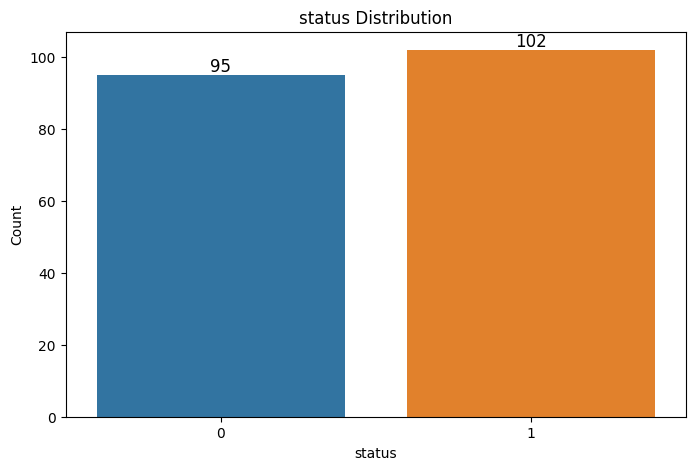

In [84]:
plot_value_counts_sns(BHT_2, 'status')

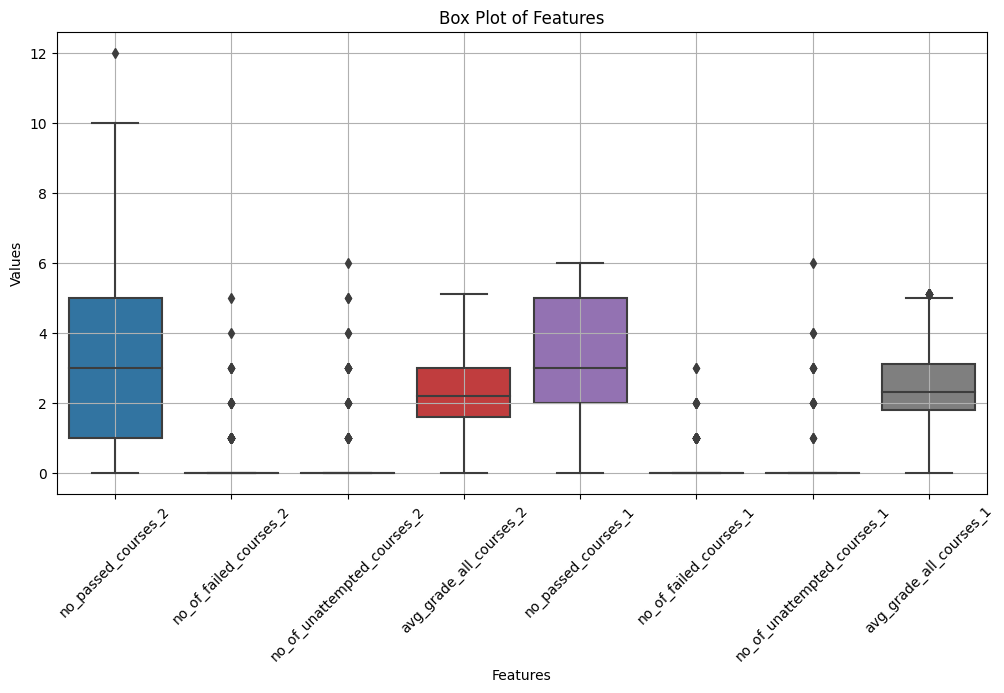

In [85]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=BHT_2.iloc[:, 1:-1])
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title("Box Plot of Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(True)

In [86]:
calculate_vif(BHT_2)

,Feature,VIF
0,student,8.276780
1,no_passed_courses_2,5.679499
2,no_of_failed_courses_2,2.707705
3,no_of_unattempted_courses_2,2.426210
4,avg_grade_all_courses_2,9.303214
5,no_passed_courses_1,5.710889
6,no_of_failed_courses_1,1.735910
7,no_of_unattempted_courses_1,1.771698
8,avg_grade_all_courses_1,7.795286
9,status,3.987869


## BHT 3

In [87]:
BHT_3.corr(method='spearman').style.background_gradient(cmap='Blues')

,student,no_passed_courses_3,no_of_failed_courses_3,no_of_unattempted_courses_3,avg_grade_all_courses_3,no_passed_courses_2,no_of_failed_courses_2,no_of_unattempted_courses_2,avg_grade_all_courses_2,no_passed_courses_1,no_of_failed_courses_1,no_of_unattempted_courses_1,avg_grade_all_courses_1,status
student,1.000000,-0.071610,-0.202406,0.384244,-0.283052,-0.144518,-0.108599,0.392720,-0.143985,-0.074251,-0.080073,0.285779,-0.126772,0.197814
no_passed_courses_3,-0.071610,1.000000,-0.270416,-0.398479,0.054989,0.637503,-0.233568,-0.271631,-0.333785,0.593152,-0.304560,-0.155543,-0.343521,-0.688573
no_of_failed_courses_3,-0.202406,-0.270416,1.000000,-0.078466,0.615628,-0.080284,0.277664,-0.082115,0.322188,-0.116031,0.390440,-0.114209,0.382270,0.220441
no_of_unattempted_courses_3,0.384244,-0.398479,-0.078466,1.000000,-0.409288,-0.201690,-0.080720,0.579794,-0.196123,-0.156390,-0.013433,0.305587,-0.115711,0.231814
avg_grade_all_courses_3,-0.283052,0.054989,0.615628,-0.409288,1.000000,0.077014,0.279882,-0.303028,0.401219,0.077285,0.278224,-0.208881,0.442133,-0.010428
no_passed_courses_2,-0.144518,0.637503,-0.080284,-0.201690,0.077014,1.000000,-0.299293,-0.319827,-0.366284,0.670864,-0.220016,-0.187058,-0.368574,-0.583559
no_of_failed_courses_2,-0.108599,-0.233568,0.277664,-0.080720,0.279882,-0.299293,1.000000,-0.041594,0.526123,-0.145680,0.470945,-0.118610,0.292663,0.309608
no_of_unattempted_courses_2,0.392720,-0.271631,-0.082115,0.579794,-0.303028,-0.319827,-0.041594,1.000000,-0.214752,-0.168682,-0.052285,0.524292,-0.142068,0.303445
avg_grade_all_courses_2,-0.143985,-0.333785,0.322188,-0.196123,0.401219,-0.366284,0.526123,-0.214752,1.000000,-0.385374,0.368714,-0.249440,0.686201,0.365900
no_passed_courses_1,-0.074251,0.593152,-0.116031,-0.156390,0.077285,0.670864,-0.145680,-0.168682,-0.385374,1.000000,-0.195165,-0.123801,-0.420621,-0.504471


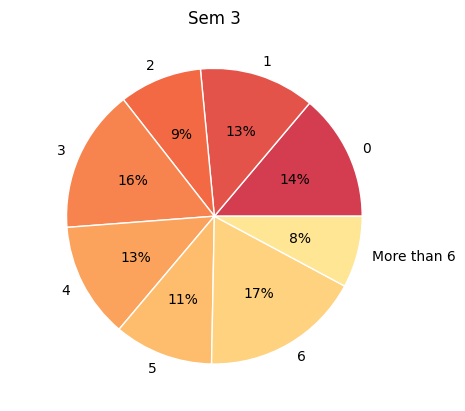

,Count,Percentage (%)
0,23,13.9
1,21,12.7
2,15,9.0
3,26,15.7
4,21,12.7
5,18,10.8
6,29,17.5
More than 6,13,7.8


In [101]:
bht3_course_count_breakdown = plot_passed_courses_distribution(BHT_3, 'no_passed_courses_3', 'Sem 3')
bht3_course_count_breakdown

In [89]:
BHT_3.corrwith(other=BHT_3['status'], method='spearman')


student                        0.197814
no_passed_courses_3           -0.688573
no_of_failed_courses_3         0.220441
no_of_unattempted_courses_3    0.231814
avg_grade_all_courses_3       -0.010428
no_passed_courses_2           -0.583559
no_of_failed_courses_2         0.309608
no_of_unattempted_courses_2    0.303445
avg_grade_all_courses_2        0.365900
no_passed_courses_1           -0.504471
no_of_failed_courses_1         0.318117
no_of_unattempted_courses_1    0.173213
avg_grade_all_courses_1        0.396536
status                         1.000000
dtype: float64

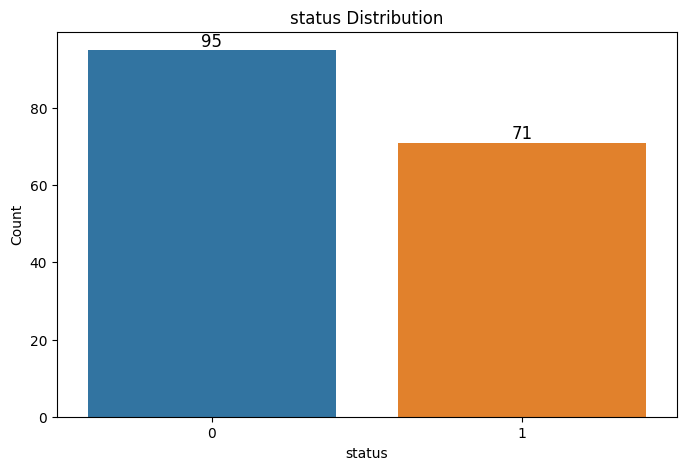

In [90]:
plot_value_counts_sns(BHT_3, 'status')

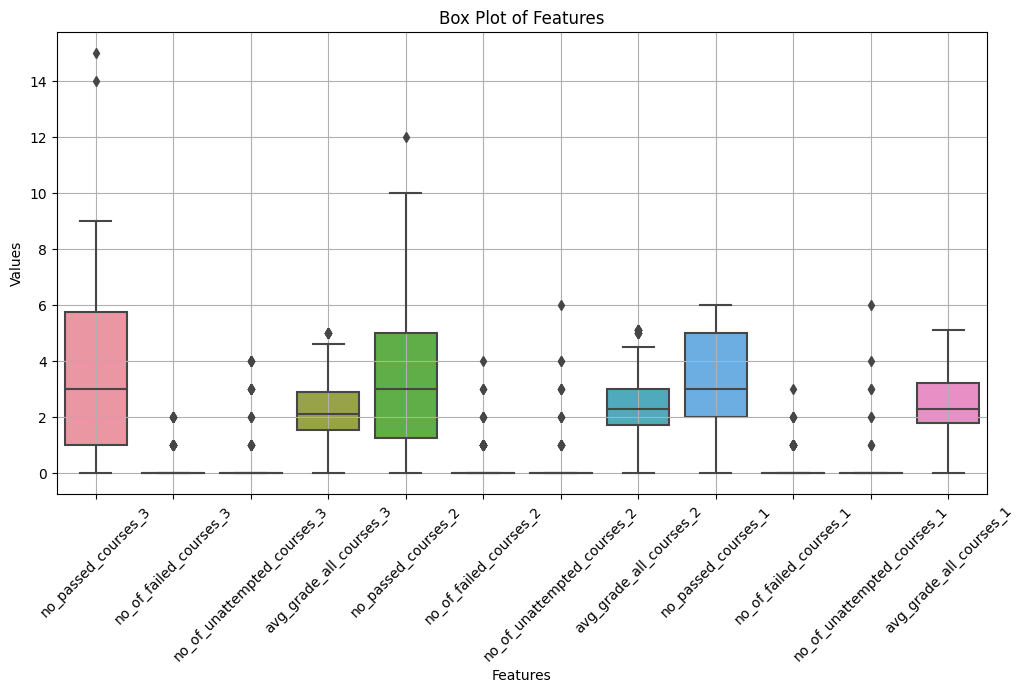

In [91]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=BHT_3.iloc[:, 1:-1])
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title("Box Plot of Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(True)

In [92]:
calculate_vif(BHT_3)

,Feature,VIF
0,student,8.475609
1,no_passed_courses_3,5.826191
2,no_of_failed_courses_3,2.786820
3,no_of_unattempted_courses_3,3.333630
4,avg_grade_all_courses_3,14.776262
5,no_passed_courses_2,6.985414
6,no_of_failed_courses_2,2.195644
7,no_of_unattempted_courses_2,2.635785
8,avg_grade_all_courses_2,13.886504
9,no_passed_courses_1,7.924561


## BHT 4

In [93]:
BHT_4.corr(method='spearman').style.background_gradient(cmap='Blues')

,student,no_passed_courses_4,no_of_failed_courses_4,no_of_unattempted_courses_4,avg_grade_all_courses_4,no_passed_courses_3,no_of_failed_courses_3,no_of_unattempted_courses_3,avg_grade_all_courses_3,no_passed_courses_2,no_of_failed_courses_2,no_of_unattempted_courses_2,avg_grade_all_courses_2,no_passed_courses_1,no_of_failed_courses_1,no_of_unattempted_courses_1,avg_grade_all_courses_1,status
student,1.000000,0.067186,-0.157706,0.425680,-0.418172,-0.015295,-0.097567,0.315413,-0.184602,-0.123168,-0.068701,0.383490,-0.091942,-0.072256,-0.134617,0.245157,-0.103769,0.169011
no_passed_courses_4,0.067186,1.000000,-0.466871,-0.267996,-0.278023,0.722474,-0.151787,-0.136676,-0.173976,0.608386,-0.171324,-0.108998,-0.358245,0.632958,-0.203116,-0.059486,-0.396100,-0.543767
no_of_failed_courses_4,-0.157706,-0.466871,1.000000,-0.127716,0.633515,-0.380023,0.312442,-0.111766,0.411050,-0.237408,0.286447,-0.139385,0.433460,-0.261116,0.301918,0.002380,0.409640,0.379989
no_of_unattempted_courses_4,0.425680,-0.267996,-0.127716,1.000000,-0.304092,-0.265879,0.009361,0.513486,-0.161795,-0.289058,-0.008327,0.589583,-0.093400,-0.190596,0.035785,0.239575,0.044873,0.382525
avg_grade_all_courses_4,-0.418172,-0.278023,0.633515,-0.304092,1.000000,-0.296569,0.279779,-0.255005,0.535569,-0.224655,0.344034,-0.275476,0.594706,-0.149712,0.321435,-0.124053,0.494631,0.269641
no_passed_courses_3,-0.015295,0.722474,-0.380023,-0.265879,-0.296569,1.000000,-0.190990,-0.231599,-0.191504,0.663500,-0.143744,-0.102508,-0.454523,0.639375,-0.228277,-0.048841,-0.432666,-0.640619
no_of_failed_courses_3,-0.097567,-0.151787,0.312442,0.009361,0.279779,-0.190990,1.000000,0.023902,0.461302,0.028174,0.227839,-0.062594,0.201270,-0.010461,0.433889,-0.086289,0.272033,0.147195
no_of_unattempted_courses_3,0.315413,-0.136676,-0.111766,0.513486,-0.255005,-0.231599,0.023902,1.000000,-0.257540,-0.110905,-0.098171,0.489970,-0.197195,-0.069888,-0.100972,0.161837,-0.104811,0.095903
avg_grade_all_courses_3,-0.184602,-0.173976,0.411050,-0.161795,0.535569,-0.191504,0.461302,-0.257540,1.000000,-0.117263,0.191773,-0.238293,0.534414,-0.121695,0.278971,-0.132508,0.566724,0.160577
no_passed_courses_2,-0.123168,0.608386,-0.237408,-0.289058,-0.224655,0.663500,0.028174,-0.110905,-0.117263,1.000000,-0.219034,-0.276888,-0.480933,0.723412,-0.154708,-0.090918,-0.429376,-0.566630


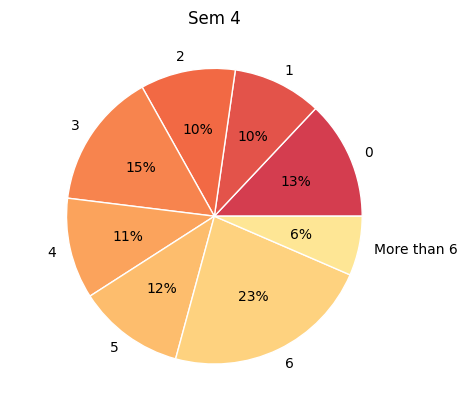

,Count,Percentage (%)
0,20,13.0
1,15,9.7
2,16,10.4
3,23,14.9
4,17,11.0
5,18,11.7
6,35,22.7
More than 6,10,6.5


In [102]:
bht4_course_count_breakdown = plot_passed_courses_distribution(BHT_4, 'no_passed_courses_4', 'Sem 4')
bht4_course_count_breakdown

In [95]:
BHT_4.corrwith(other=BHT_1['status'], method='spearman')

student                       -0.021284
no_passed_courses_4            0.055391
no_of_failed_courses_4        -0.092636
no_of_unattempted_courses_4   -0.038811
avg_grade_all_courses_4       -0.169340
no_passed_courses_3            0.070753
no_of_failed_courses_3         0.063125
no_of_unattempted_courses_3   -0.040331
avg_grade_all_courses_3       -0.158542
no_passed_courses_2            0.209574
no_of_failed_courses_2        -0.003155
no_of_unattempted_courses_2   -0.158121
avg_grade_all_courses_2       -0.181182
no_passed_courses_1            0.103585
no_of_failed_courses_1         0.112264
no_of_unattempted_courses_1   -0.150161
avg_grade_all_courses_1       -0.049296
status                        -0.199844
dtype: float64

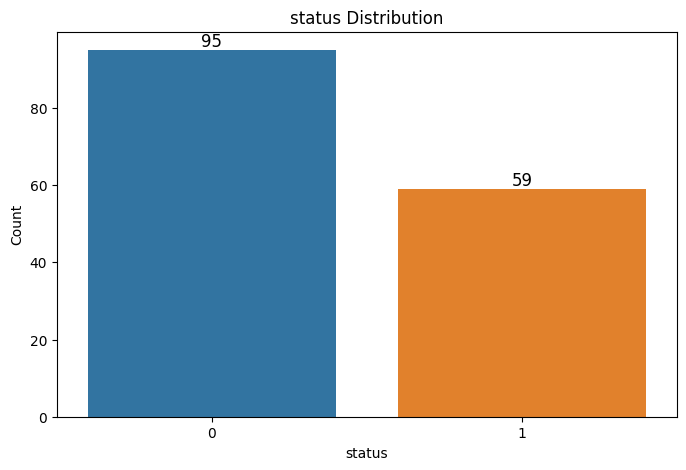

In [96]:
plot_value_counts_sns(BHT_4, 'status')

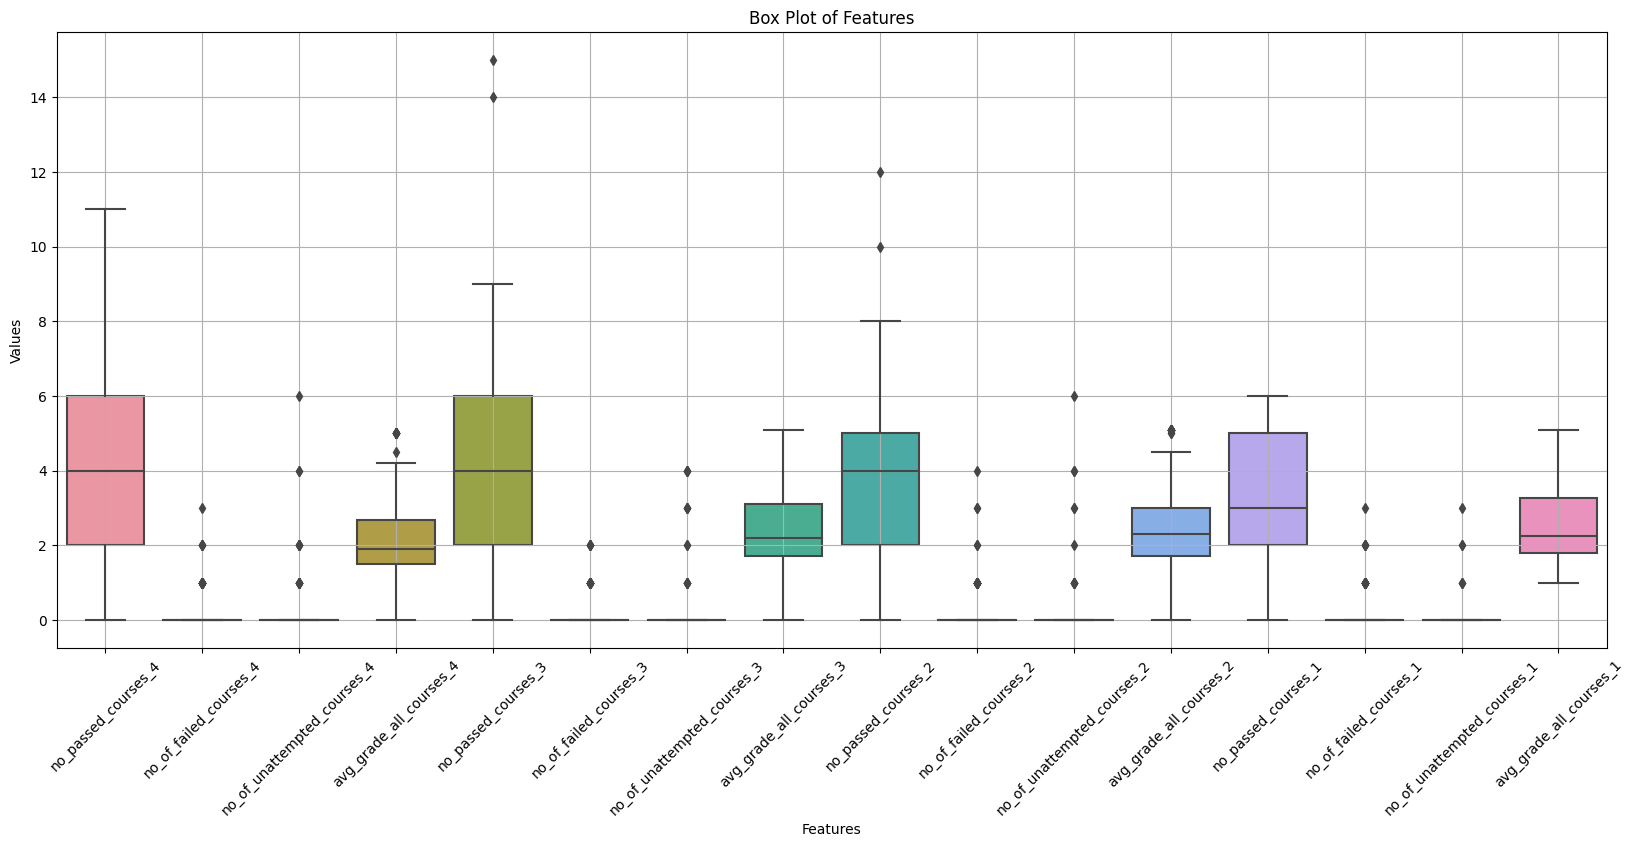

In [97]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=BHT_4.iloc[:, 1:-1])
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title("Box Plot of Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(True)